In [1]:
%matplotlib inline
import numpy as np
import numba
import matplotlib.pyplot as plt
import matplotlib.colors

# @customize plot style 
plt.rcParams['axes.grid'] = 'True'
plt.rcParams['grid.color'] = 'gray'
plt.rcParams['grid.linestyle'] = '--'
plt.rcParams['grid.linewidth'] = 0.2
plt.rcParams['xtick.direction'] = 'in'
plt.rcParams['ytick.direction'] = 'in'
plt.rcParams['xtick.top'] = True
plt.rcParams['ytick.right'] = True
plt.rcParams['xtick.bottom'] = True
plt.rcParams['ytick.left'] = True
plt.rcParams['xtick.minor.visible'] = True
plt.rcParams['ytick.minor.visible'] = True
plt.rcParams['ytick.minor.left'] = True
plt.rcParams['ytick.minor.right'] = True
plt.rcParams['figure.figsize'] = [4.0, 3.0]

plt.rc('font', family='serif')
custom_preamble = {
    "text.usetex": True,
    "text.latex.preamble": [
        r"\usepackage{amsmath}", # for the align enivironment
        ],
    }
plt.rcParams.update(custom_preamble)

# @working path
FIG_PATH     = '../tex/figs/'
WEB_FIG_PATH = '../tex/web-figs/'
DATA_PATH    = '../code/'


# @global settings
WEB_FIG_DPI  = 600
FIG_DPI      = 600
FIG_EXT      = '.pdf'
WEB_FIG_EXT  = '.png'

# @global functions
def savefig(handler,name, fig_ext = FIG_EXT, web_fig_ext = WEB_FIG_EXT):
    handler.savefig(FIG_PATH + name + fig_ext, dpi = FIG_DPI,bbox_inches = 'tight', pad_inches = 0.1)
    handler.savefig(WEB_FIG_PATH + name + web_fig_ext, dpi = WEB_FIG_DPI,bbox_inches = 'tight', pad_inches = 0.1)

In [9]:
def load_secular(name):
    data = np.loadtxt(name)
    t = data[:,0]
    L1 = data[:,1:4]
    e1 = data[:,4:7]
    L2 = data[:,7:10]
    e2 = data[:,10:13]
    return {'t':t, 'L1':L1, 'e1':e1,'e2':e2,'L2':L2}
def load_std(name):
    data = np.loadtxt(name)
    t=data[:,0]
    e=data[:,1]
    return {'t':t,'e1':e}
def draw_compare(d1,d2):
    fig = plt.figure()
    #plt.plot(d1['t'],1-d1['e1'],label='mathematica',lw=0.5)
    plt.plot(d2['t'],1-np.sqrt((d2['e1']**2).sum(axis=1)),label='new',ls='--',lw=0.5)
    
    #plt.plot(d2['L2'][0:30000,0],d2['L2'][0:30000,2],'--',lw=0.5)
    plt.plot(d1['t'],1-np.sqrt((d1['e1']**2).sum(axis=1)),label='C',ls='--',lw=0.5)
    #plt.yscale('log')
    
    plt.legend()
    plt.savefig('test.png',bbox_inches = 'tight',dpi=300)

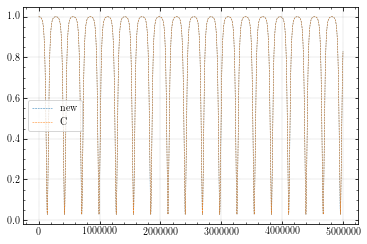

In [11]:
data = load_secular('testSA/trajectory_1.txt')
std = load_secular('testold/trajectory_1.txt')
#std = load_std('testSA/eccentricity.txt')

draw_compare(std,data)

In [39]:
np.pi/4

0.7853981633974483

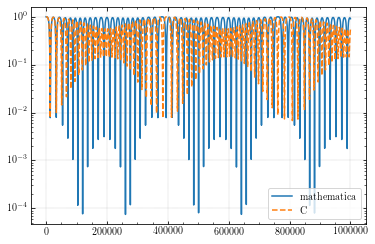

In [14]:
data = load_secular('test2/trajectory_1.txt')
std = load_std('example2/eccentricity.txt')

draw_compare(std,data)